In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [4]:
df=pd.read_csv('227k_labeled_sentences.txt', sep=' == ', header = None,names=["labels", "sentences"])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
df

,labels,sentences
0,0,the first human study using these compounds an...
1,1,"the subjects were exposed to uv irradiation, c..."
2,0,three different doses of az12048189 were admin...
3,1,"az12048189 did not, however, have any signific..."
4,1,this study also proved that trpv1 antagonists ...
5,0,"the ocular surface disease index score, tear o..."
6,1,the results were graded and classified on the ...
7,1,"discomfort, severity and frequency of symptoms..."
8,0,mean fluorescein tear breakup time was 4.51 \u...
9,1,mean schirmer i test result was 3.51 \u00b1 3....


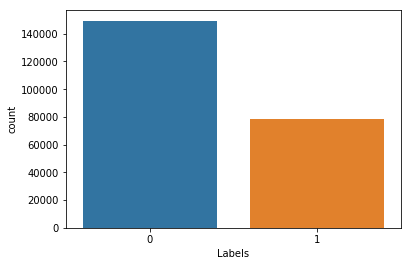

In [6]:
sns.countplot(df.labels)
plt.xlabel('Labels')
plt.show()

In [7]:
X = df.sentences
Y = df.labels
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [9]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [12]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [13]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [14]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=2,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Instructions for updating:
Use tf.cast instead.
Train on 127520 samples, validate on 31881 samples
Epoch 1/2
127520/127520 [==============================] - 300s 2ms/step - loss: 0.6273 - acc: 0.9097 - val_loss: 0.1417 - val_acc: 0.9629
Epoch 2/2
127520/127520 [==============================] - 316s 2ms/step - loss: 0.1377 - acc: 0.9636 - val_loss: 0.1354 - val_acc: 0.9639


In [15]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [16]:
accr = model.evaluate(test_sequences_matrix,Y_test)


68315/68315 [==============================] - 203s 3ms/step


In [17]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}\n '.format(accr[0],accr[1]))

Test set
  Loss: 0.131
  Accuracy: 0.965
 


In [18]:
from sklearn.metrics import classification_report

In [19]:
yt=[j for i in Y_test for j in i]

In [20]:
sample_texts = X_test
txts = tok.texts_to_sequences(sample_texts)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)

In [21]:
preds=[1 if i>0.5 else 0 for i in preds]

In [22]:
preds

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [23]:
print(classification_report(yt,preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     44865
           1       1.00      0.90      0.95     23450

   micro avg       0.97      0.97      0.97     68315
   macro avg       0.97      0.95      0.96     68315
weighted avg       0.97      0.97      0.96     68315



In [29]:
sample_texts = X_test
txts = tok.texts_to_sequences(sample_texts)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)



In [30]:
preds

array([[0.00505713],
       [0.03339189],
       [0.08003902],
       ...,
       [0.9998373 ],
       [0.08225385],
       [0.99999654]], dtype=float32)

In [31]:
a=[]
for i in preds:
    if i == 1:
        a.append(i)
len(a)

7231

In [32]:
r=[]
results =  zip(X_test,Y_test,preds)
for i in results:
    r.append(i)

In [33]:
r

[('t1-weighted mri scans were acquired at baseline in all participants; 55 individuals (33 mutation carriers; 22 controls) had multiple (mean 2.9) follow-up scans approximately annually.',
  array([0]),
  array([0.00505713], dtype=float32)),
 ('in the case of current prevalence of asthma and cumulative prevalence of asthma also be studying, ora: 1.34 and ora: 1.46 respectively.',
  array([0]),
  array([0.03339189], dtype=float32)),
 ('the relationship of clinical, metabolic and immune mediators with ir and epcs was verified.',
  array([0]),
  array([0.08003902], dtype=float32)),
 ('the c allele of rs2237892 variant contributed to susceptibility to t2dm (odds ratio [or], 1.45; 95% confidence interval [ci], 1.20-1.75).',
  array([1]),
  array([0.03292903], dtype=float32)),
 ('"\'two patients with rheumatoid arthritis and one with sj\\u00f6gren syndrome had a severe sensorimotor neuropathy preceding or up to 5 years after the onset of the disease.',
  array([0]),
  array([0.07845116], dty

In [34]:
r[2]

('the relationship of clinical, metabolic and immune mediators with ir and epcs was verified.',
 array([0]),
 array([0.08003902], dtype=float32))

In [36]:
sample_texts = ["the results of this study point out the possible role of nesfatin-1 and vaspin as potential novel biomarkers for the prediction and early diagnosis of gdm."]
txts = tok.texts_to_sequences(sample_texts)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)
preds

array([[0.99999154]], dtype=float32)